# Parkinson's Disease Detection

### Introduction

Parkinson's is a progressive nervous system disorder that affects movement and causes shaking. Symptoms of the disease usually start out mild, but get worse over time. Many people around the world are affected by this disease, while it can't be cured, doctors are able to perscribe mdeicine to help with the symptoms.

Parkinson's causes many symptoms, including, but not limited to: tremors, slowed movement, rigid muscles, impaired posture and balance, loss of automatic movements, and speach and writing changes. These are the symptoms most likely to appear first, while in later stages the disease can cause dementia and other mental health problems such as depression.

Scientists and Doctors around the world have not been able to find the cause of Parkinson's disease, so preventing the disease is near impossible. What we do know about the disease, is that certian neurons in the brain slowly break down and die. Many of the symptoms are caused due to a lack of dopamine in the brain, causing the motor issues patients face. Genes likely play a roll where mutations cause the disease but is uncommon, unless there is a lot of cases of Parkinson's in the patients family.

Everything talked about above will be used to help us build a model to detect the disease. We will use data from [UCL ML Parkinson's dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/).

### Analysis

We will be using classifictation methods to solve this problem, so we will use K Nearest Neighbors(KNN), Logistical Regression, Support Vector Machine(SVM), Decision Trees, and at the end we will take a look at a different classification methos called XGBoost. A confusion matrix will be used to help visualize how effective each model is at predicting the correct outcomes. We will use GridSearchCV to find the best hyperparameters for each model.

In [8]:
#import all packages
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Make a function that will plot a confusion matrix
def ConfusionMatrix(y, y_pred):
    from sklearn.metrics import confusion_matrix
    
    CM = confusion_matrix(y, y_pred)
    ax = plt.subplot()
    sns.heatmap(CM, annot = True, ax = ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title("Confusion Matrix");
    ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive'])

In [2]:
#read in the data
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#Now we get the features and labels from the df
feat = df.loc[:,df.columns != 'status'].values[:,1:]
lab = df.loc[:, 'status'].values

#now we will find the count of the number of 0, 1's that are in the status column
print("Number of 1's: ", lab[lab == 1].shape[0], "\n Number of 0's: ", lab[lab == 0].shape[0])

Number of 1's:  147 
 Number of 0's:  48


In [5]:
# Now we normalize the features
s = MinMaxScaler((-1, 1))
X = s.fit_transform(feat)
Y = lab

#use tain test split function
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

#### K Nearest Neighbors

Best hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
Model accuracy:  94.29166666666667 % accuracy
Test data accuracy:  97.43589743589743 % accuracy using the score function. 



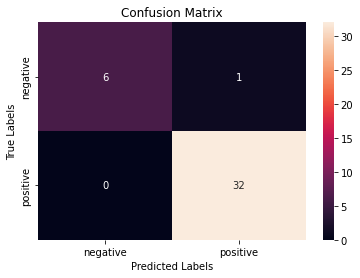

In [25]:
KNN = KNeighborsClassifier()

#create a parameter dictionary to use to find the best parameters
KNNP = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
       'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree'],
       'p': [1, 2]}
# Use GridSearchCV to find the best parameters
gsKNN = GridSearchCV(estimator = KNN, param_grid = KNNP, cv = 10, scoring = 'accuracy')

KNNCV = gsKNN.fit(X_train, Y_train)

print("Best hyperparameters: ", KNNCV.best_params_)
print("Model accuracy: ", KNNCV.best_score_ * 100, "% accuracy")
print("Test data accuracy: ", KNNCV.score(X_test, Y_test) * 100, "% accuracy using the score function. \n")

yh = KNNCV.predict(X_test)
ConfusionMatrix(Y_test, yh)

#### Logistical Regression

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Model accuracy:  84.08333333333336 % accuracy
Test data accuracy:  87.17948717948718 % accuracy using the score function. 



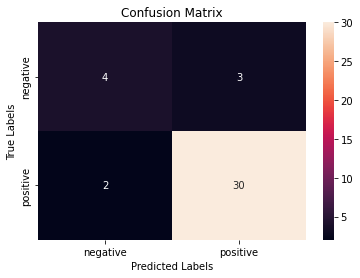

In [19]:
LR = LogisticRegression()

LRP = {"C": [0.01, 0.1, 1], "penalty": ['l2'], 'solver': ['lbfgs']}
gsLR = GridSearchCV(estimator = LR, param_grid = LRP, cv = 10, scoring = 'accuracy')

LRCV = gsLR.fit(X_train, Y_train)

print("Best hyperparameters: ", LRCV.best_params_)
print("Model accuracy: ", LRCV.best_score_ * 100, "% accuracy")
print("Test data accuracy: ", LRCV.score(X_test, Y_test) * 100, "% accuracy using the score function. \n")

yh = LRCV.predict(X_test)
ConfusionMatrix(Y_test, yh)

#### Support Vector Machine

Best Hyperparameters:  {'C': 31.622776601683793, 'gamma': 1.0, 'kernel': 'rbf'}
Model score:  93.04166666666667 % accuracy
Test data accuracy:  97.43589743589743 % accuracy using the score function. 



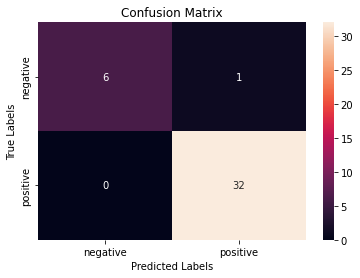

In [21]:
SVM = SVC()

SVMP = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
       'C': np.logspace(-3, 3, 5), 
       'gamma': np.logspace(-3, 3, 5)}
gsSVM = GridSearchCV(estimator = SVM, param_grid = SVMP, cv = 10, scoring = 'accuracy')

SVMCV = gsSVM.fit(X_train, Y_train)

print("Best Hyperparameters: ",  SVMCV.best_params_)
print("Model score: ", SVMCV.best_score_ * 100, "% accuracy")
print("Test data accuracy: ", SVMCV.score(X_test, Y_test) * 100, "% accuracy using the score function. \n")

yh = SVMCV.predict(X_test)
ConfusionMatrix(Y_test, yh)

#### Decision Tree

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Model accuracy:  90.45833333333333 % accuracy
Test data accuracy:  76.92307692307693 % accuracy using the score function. 



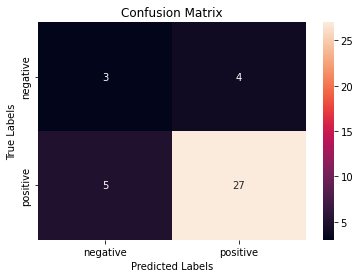

In [24]:
DT = DecisionTreeClassifier()
DTP = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
gsDT = GridSearchCV(estimator = DT, param_grid = DTP, cv = 10, scoring = 'accuracy')

DTCV = gsDT.fit(X_train, Y_train)

print("Best Hyperparameters: ", DTCV.best_params_)
print("Model accuracy: ", DTCV.best_score_ * 100, "% accuracy")
print("Test data accuracy: ", DTCV.score(X_test, Y_test) * 100, "% accuracy using the score function. \n")

yh = DTCV.predict(X_test)
ConfusionMatrix(Y_test, yh)

Now that we have trained and tested many models we can now find the best model, and fine tune the hyperparameters to find the best.

In [26]:
models = {'KNN': KNNCV.best_score_, 'Tree': DTCV.best_score_, 'Log Regression': LRCV.best_score_, 
          'SVM': SVMCV.best_score_}
BA = max(models, key = models.get)
print("The best model is: ", BA, ", with score: ", models[BA] * 100, "% accuracy.")
if BA == 'KNN':
    print("Best Parameters: ", KNNCV.best_params_)
elif BA == 'Tree':
    print("Best Parameters: ", DTCV.best_params_)
elif BA == 'Log Regression':
    print("Best Parameters: ", LRCV.best_params_)
elif BA == 'SVM':
    print("Best Parameters: ", SVMCV.best_params_)
else:
    print("Something Went Wrong!")

The best model is:  KNN , with score:  94.29166666666667 % accuracy.
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}


## Results 

From our tests on the data set using many different classification algoritms, we found that the K Nearest Neighbors was the best model with a score of 94.2%. The best parameters were found using the gird search cv.